# Classification

Unlike regression where you predict a continuous number, you use classification to predict a category. 

Classification models include linear models like Logistic Regression, SVM, and nonlinear ones like K-NN, Kernel SVM and Random Forests.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Logistic Regression

Logistic Regression is used when the dependent variable(target) is categorical.

For example,
* To predict whether an email is spam (1) or (0)
* Whether the tumor is malignant (1) or not (0)

Linear Function: $y = b_0 + b_1x$<br>
<font color='blue'>Logistic Function: $p = \frac{1}{1+e^{-y}}$  $\longrightarrow$  $p(x) = \frac{1}{1+e^{-(b_0 + b_1x)}}$</font> where $p(x)$ is the Probability of $x$<img src='https://miro.medium.com/max/875/1*RqXFpiNGwdiKBWyLJc_E7g.png' width=600>
Inverse of Logistic Function:  $ln(\frac{p(x)}{1-p(x)}) = b_0 + b_1x$

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,-1].values

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

### Fitting Logistic Regression

Logistic Regression is a linear classifier which means the categories will be separated by a straight line

In [4]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0,solver='lbfgs')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

### Evaluate the Logistic Regression (Confusion Matrix)

In [5]:
from sklearn.metrics import confusion_matrix

Class contains Upper case at beginning of the word, but function is all Lower case

In [6]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

Where '65' and '24' are correct prediction, it means there're 89 (65+24) correct predictions and 11 (3+8) incorrect predictions

### Visualising

The prediction boundary is always a straight line if The logistic regression classifier is linear<br>
如果是 2 Dimensions 的话, prediction boundary是一条线。如果是3D的话, prediction boundary是一个直平面<br>
The prediction boundary can be non-linear when we build non-linear classifiers<br>

The idea to plot the following graph is to take all the pixel points of the framework and apply the classifier on it. It makes each pixel will have X (age) and y (salary).<br>
Then we apply the logistic regression to predict if each pixel point has value 0 or 1. <br>
It's going to colorize the pixel in red if it is 0, and it's green if it's 1.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


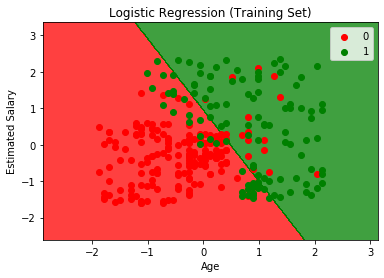

In [10]:
from matplotlib.colors import ListedColormap    # ListedColormap helps us colorize all the data points
# Create some local variable X set that we can replace X_train easily by other data later (ie. X_test)
X_set, y_set = X_train, y_train    
# np.meshgrid prepares all the pixel points, min and max value +-1 because we don't want the points to be squeezed on the axes
# X_set[:,0] is age and X_set[:,1] is salary in this case
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                    np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))
# Use the contourf function to actually make the contour between the two prediction regions
# X1.ravel() 将 matrix 变成 1D array
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## K-Nearest Neighbors (K-NN)

## Support Vector Machine (SVM)

## Kernel SVM

## Naive Bayes

## Decision Tree Classification

## Random Forest Classification

## Evaluating Classification Models Performance